### STARBUCKS DRINKS INTRODUCTION

Starbucks is an American coffee chain founded in Seattle. It serves both beverages and food.As a cofee lover, I love Starbucks.Being an health enthusiast I am worried about sugar content in starbucks drinks as thend to have lot of sugar in them.

### OBJECTIVE

#### Which Starbucks drinks other than black coffee should I order to have a low sugar drink ?
#### What drinks have high protien with less than 25g sugar?
#### Can coffee raise cholesterol?


Lets start by exploring our dataset

In [3]:
# Import all the necessary libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")

In [5]:
# Read the data
drinks = pd.read_csv("/Users/HOME/Desktop/Springboard/starbucks_drinkMenu.csv",index_col = 0)
drinks.head()

,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
Beverage_category,,,,,,,,,,,,,,,,,
Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


#### DATA CLEANING

In [6]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, Coffee to Frappuccino® Blended Crème
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage                   242 non-null    object 
 1   Beverage_prep              242 non-null    object 
 2   Calories                   242 non-null    int64  
 3    Total Fat (g)             242 non-null    object 
 4   Trans Fat (g)              242 non-null    float64
 5   Saturated Fat (g)          242 non-null    float64
 6    Sodium (mg)               242 non-null    int64  
 7    Total Carbohydrates (g)   242 non-null    int64  
 8   Cholesterol (mg)           242 non-null    int64  
 9    Dietary Fibre (g)         242 non-null    int64  
 10   Sugars (g)                242 non-null    int64  
 11   Protein (g)               242 non-null    float64
 12  Vitamin A (% DV)           242 non-null    object 
 13  Vitamin C (% DV)           

In [7]:
drinks.columns

Index(['Beverage', 'Beverage_prep', 'Calories', ' Total Fat (g)',
       'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [10]:
columns = list(map(str.strip, drinks.columns))

In [11]:
drinks.columns = columns

In [13]:
drinks.dtypes

Beverage                    object
Beverage_prep               object
Calories                     int64
Total Fat (g)               object
Trans Fat (g)              float64
Saturated Fat (g)          float64
Sodium (mg)                  int64
Total Carbohydrates (g)      int64
Cholesterol (mg)             int64
Dietary Fibre (g)            int64
Sugars (g)                   int64
Protein (g)                float64
Vitamin A (% DV)            object
Vitamin C (% DV)            object
Calcium (% DV)              object
Iron (% DV)                 object
Caffeine (mg)               object
dtype: object

In [14]:
drinks['Total Fat (g)'].values

array(['0.1', '0.1', '0.1', '0.1', '0.1', '3.5', '2.5', '0.2', '6', '4.5',
       '0.3', '7', '5', '0.4', '9', '7', '1.5', '4', '3.5', '2', '6', '5',
       '2.5', '8', '7', '3', '11', '9', '0.1', '3.5', '2.5', '0.2', '5',
       '4', '0.3', '6', '5', '0.3', '9', '7', '0', '0', '0', '0', '0.1',
       '3', '1.5', '0.1', '3.5', '3', '0.2', '4', '3.5', '0.2', '6',
       '4.5', '0', '0', '0.1', '0.2', '0.3', '0.3', '1', '4', '3', '1',
       '5', '4.5', '1', '7', '5', '1', '8', '7', '3', '6', '5', '4.5',
       '9', '8', '6', '11', '10', '7', '15', '13', '1.5', '4.5', '3.5',
       '2', '7', '6', '2.5', '9', '7', '3', '11', '9', '0', '0', '0', '0',
       '0', '0', '0', '0', '0.1', '2', '1.5', '0.2', '3.5', '2.5', '0.2',
       '4.5', '3.5', '0.3', '6', '4.5', '0.2', '4', '3', '0.4', '6',
       '4.5', '0.5', '8', '6', '0.5', '10', '8', '0.1', '2', '1.5', '0.1',
       '3', '2.5', '0.2', '4', '3.5', '0.2', '5', '4', '0.1', '2', '1.5',
       '0.1', '3', '2.5', '0.2', '4', '3.5', '0.2', '

In [23]:
drinks['Total Fat (g)'][drinks['Total Fat (g)'] == '3 2'] = '3.2'

In [24]:
drinks['Total Fat (g)'].values

array(['0.1', '0.1', '0.1', '0.1', '0.1', '3.5', '2.5', '0.2', '6', '4.5',
       '0.3', '7', '5', '0.4', '9', '7', '1.5', '4', '3.5', '2', '6', '5',
       '2.5', '8', '7', '3', '11', '9', '0.1', '3.5', '2.5', '0.2', '5',
       '4', '0.3', '6', '5', '0.3', '9', '7', '0', '0', '0', '0', '0.1',
       '3', '1.5', '0.1', '3.5', '3', '0.2', '4', '3.5', '0.2', '6',
       '4.5', '0', '0', '0.1', '0.2', '0.3', '0.3', '1', '4', '3', '1',
       '5', '4.5', '1', '7', '5', '1', '8', '7', '3', '6', '5', '4.5',
       '9', '8', '6', '11', '10', '7', '15', '13', '1.5', '4.5', '3.5',
       '2', '7', '6', '2.5', '9', '7', '3', '11', '9', '0', '0', '0', '0',
       '0', '0', '0', '0', '0.1', '2', '1.5', '0.2', '3.5', '2.5', '0.2',
       '4.5', '3.5', '0.3', '6', '4.5', '0.2', '4', '3', '0.4', '6',
       '4.5', '0.5', '8', '6', '0.5', '10', '8', '0.1', '2', '1.5', '0.1',
       '3', '2.5', '0.2', '4', '3.5', '0.2', '5', '4', '0.1', '2', '1.5',
       '0.1', '3', '2.5', '0.2', '4', '3.5', '0.2', '

In [26]:
drinks['Total Fat (g)'] = drinks['Total Fat (g)'].astype('float')

In [27]:
drinks['Total Fat (g)'].dtype

dtype('float64')

In [28]:
drinks['Caffeine (mg)'].values

array(['175', '260', '330', '410', '75', '75', '75', '75', '75', '75',
       '150', '150', '150', '150', '150', '150', '85', '85', '85', '95',
       '95', '95', '175', '175', '175', '180', '180', '180', '75', '75',
       '75', '75', '75', '75', '150', '150', '150', '150', '150', '150',
       '75', '150', '225', '300', '75', '75', '75', '75', '75', '75',
       '150', '150', '150', '150', '150', '150', '75', '150', '75', '75',
       '150', '150', '75', '75', '75', '75', '75', '75', '150', '150',
       '150', '150', '150', '150', '75', '75', '75', '75', '75', '75',
       '150', '150', '150', '150', '150', '150', '10', '10', '10', '20',
       '20', '20', '25', '25', '25', '30', '30', '30', '0', '0', '0', '0',
       'Varies', 'Varies', 'Varies', 'Varies', '50', '50', '50', '70',
       '70', '70', '95', '95', '95', '120', '120', '120', '25', '25',
       '25', '55', '55', '55', '80', '80', '80', '110', '110', '110',
       'varies', 'varies', 'varies', 'varies', 'varies', 'varies'

In [34]:
drinks['Vitamin A (% DV)'].values

array([ 0,  0,  0,  0, 10, 10,  6, 15, 15, 10, 20, 20, 15, 30, 25, 20,  8,
        8,  6, 15, 15, 10, 20, 15, 10, 25, 20, 15, 10, 10,  6, 15, 15, 10,
       20, 20, 10, 25, 25, 15,  0,  0,  0,  0,  8,  8,  4, 10, 10,  6, 15,
       10,  8, 20, 15, 10,  0,  0, 10, 15, 20, 25, 10, 10,  6, 15, 15, 10,
       20, 15, 10, 25, 20, 15, 10,  8,  6, 15, 15, 10, 20, 15, 10, 25, 20,
       15, 10, 10,  6, 15, 15, 10, 20, 20, 15, 25, 25, 15,  0,  0,  0,  0,
        0,  0,  0,  0,  6,  6,  4, 10, 10,  6, 15, 10,  8, 15, 15, 10, 10,
       10,  8, 20, 15, 10, 25, 20, 15, 30, 25, 20,  6,  6,  4, 10,  8,  6,
       15, 10,  8, 15, 15, 10,  6,  6,  4, 10,  8,  6, 15, 10,  8, 15, 15,
       10,  0,  0,  0,  2,  2,  2,  4,  4,  2,  6,  6,  4,  0,  0,  0,  0,
        0,  0, 10,  8,  6, 50, 50, 50,  4,  4,  2,  4,  4,  4,  6,  4,  4,
       10,  8,  6,  4,  4,  4,  6,  4,  4, 10,  8,  6,  4,  4,  4,  6,  4,
        4, 10,  8,  6,  4,  4,  4,  6,  4,  4, 10,  6,  6,  4,  6,  8,  4,
        6,  8,  4,  6,  8

In [32]:
drinks['Vitamin A (% DV)'] = drinks['Vitamin A (% DV)'].apply(lambda x: x.strip('%')).astype('int')

In [33]:
drinks['Vitamin A (% DV)'].dtype

dtype('int64')

In [35]:
drinks['Vitamin C (% DV)'] = drinks['Vitamin C (% DV)'].apply(lambda x: x.strip('%')).astype('int')

In [36]:
drinks['Calcium (% DV)'] = drinks['Calcium (% DV)'].apply(lambda x: x.strip('%')).astype('int')

In [38]:
drinks['Iron (% DV)'].values

array(['0%', '0%', '0%', '0%', '0%', '0%', '8%', '0%', '0%', '15%', '0%',
       '0%', '15%', '0%', '0%', '25%', '10%', '10%', '20%', '20%', '20%',
       '30%', '25%', '25%', '40%', '30%', '30%', '50%', '0%', '0%', '8%',
       '0%', '0%', '15%', '0%', '0%', '15%', '0%', '0%', '20%', '0%',
       '0%', '0%', '0%', '0%', '0%', '6%', '0%', '0%', '8%', '0%', '0%',
       '10%', '0%', '0%', '15%', '0%', '0%', '0%', '0%', '0%', '0%', '0%',
       '0%', '8%', '0%', '0%', '10%', '0%', '0%', '15%', '0%', '0%',
       '20%', '0%', '0%', '8%', '0%', '0%', '10%', '2%', '0%', '15%',
       '2%', '2%', '20%', '10%', '10%', '20%', '20%', '20%', '30%', '25%',
       '25%', '40%', '30%', '30%', '50%', '0%', '0%', '0%', '0%', '0%',
       '0%', '0%', '0%', '0%', '0%', '6%', '2%', '2%', '10%', '2%', '2%',
       '10%', '2%', '2%', '15%', '2%', '2%', '10%', '4%', '4%', '15%',
       '4%', '4%', '25%', '6%', '6%', '30%', '0.00%', '0.00%', '6.00%',
       '0.00%', '0.00%', '8.00%', '0.00%', '0.00%', '10.0

In [47]:
drinks['Iron (% DV)'] = drinks['Iron (% DV)'].apply(lambda x: int(float(x.strip('%'))))

In [48]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, Coffee to Frappuccino® Blended Crème
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage                 242 non-null    object 
 1   Beverage_prep            242 non-null    object 
 2   Calories                 242 non-null    int64  
 3   Total Fat (g)            242 non-null    float64
 4   Trans Fat (g)            242 non-null    float64
 5   Saturated Fat (g)        242 non-null    float64
 6   Sodium (mg)              242 non-null    int64  
 7   Total Carbohydrates (g)  242 non-null    int64  
 8   Cholesterol (mg)         242 non-null    int64  
 9   Dietary Fibre (g)        242 non-null    int64  
 10  Sugars (g)               242 non-null    int64  
 11  Protein (g)              242 non-null    float64
 12  Vitamin A (% DV)         242 non-null    int64  
 13  Vitamin C (% DV)         242 non-null    int64  
 14  Cal

In [49]:
#Count of unique values or codes
drinks.nunique()

Beverage                   33
Beverage_prep              13
Calories                   48
Total Fat (g)              24
Trans Fat (g)              18
Saturated Fat (g)           4
Sodium (mg)                 9
Total Carbohydrates (g)    51
Cholesterol (mg)           75
Dietary Fibre (g)           8
Sugars (g)                 70
Protein (g)                26
Vitamin A (% DV)           11
Vitamin C (% DV)           10
Calcium (% DV)             14
Iron (% DV)                13
Caffeine (mg)              36
dtype: int64

In [50]:
#Range of values per column
drinks.agg(['min','max'])

,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV)
min,Banana Chocolate Smoothie,2% Milk,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0
max,White Chocolate Mocha (Without Whipped Cream),Whole Milk,510,15.0,9.0,0.3,40,340,90,8,84,20.0,50,100,60,50


In [51]:
#summary statistics
drinks.describe()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,2.904959,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512,9.830579,3.648760,20.756198,7.446281
std,102.863303,2.944376,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659,8.097962,14.421794,14.542343,10.486467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.200000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000,4.000000,0.000000,10.000000,0.000000
50%,185.000000,2.500000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000,8.000000,0.000000,20.000000,2.000000
75%,260.000000,4.500000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000,15.000000,0.000000,30.000000,10.000000
max,510.000000,15.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000,50.000000,100.000000,60.000000,50.000000


In [63]:
#Checking null values
drinks.isna().any()

Beverage                   False
Beverage_prep              False
Calories                   False
Total Fat (g)              False
Trans Fat (g)              False
Saturated Fat (g)          False
Sodium (mg)                False
Total Carbohydrates (g)    False
Cholesterol (mg)           False
Dietary Fibre (g)          False
Sugars (g)                 False
Protein (g)                False
Vitamin A (% DV)           False
Vitamin C (% DV)           False
Calcium (% DV)             False
Iron (% DV)                False
Caffeine (mg)               True
dtype: bool

In [56]:
drinks[drinks['Caffeine (mg)'].isna()]

,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
Beverage_category,,,,,,,,,,,,,,,,,
Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1.0,0.5,0.0,5,25,18,0,18,2.0,2,0,6,0,NaN


In [70]:
#Fill the null value with the appropriate value relative to other column values which has same properties
drinks['Caffeine (mg)'].fillna(90,inplace = True)

In [74]:
#Check the duplicate rows
drinks[drinks.duplicated()]

,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
Beverage_category,,,,,,,,,,,,,,,,,


In [76]:
#Export the cleaned dataset to new csv file
drinks.to_csv("/Users/HOME/Desktop/Springboard/starbucks.csv")

In [80]:
drinks.reset_index(inplace = True)

### Explorartory Data Analysis

Now we have the clean dataset without null values and with appropriate datatypes.Lets start explore the dataset.

In [99]:
drinks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0,75


### CATEGORIES OF BEVERAGES
What type of beverages does the Starbucks have?

Text(0.5, 1, 'Categories of Beverages')

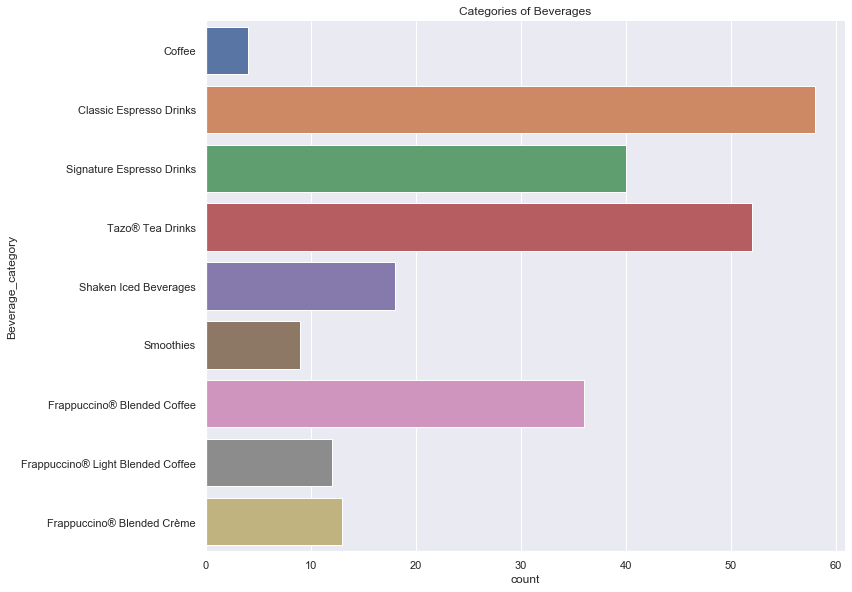

In [105]:
sns.catplot(y = 'Beverage_category', kind = 'count', data = drinks, height=8, aspect=1.5)
plt.title("Categories of Beverages")

. There are 9 categories of Beverages

    Coffee
    Classic Espresso Drinks
    Frappuccino® Blended Coffee
    Frappuccino® Blended Crème
    Frappuccino® Light Blended Coffee
    Shaken Iced Beverages	
    Signature Espresso Drinks
    Smoothies
    Tazo® Tea Drinks
   

Looks like each beverage category has different types of beverage.

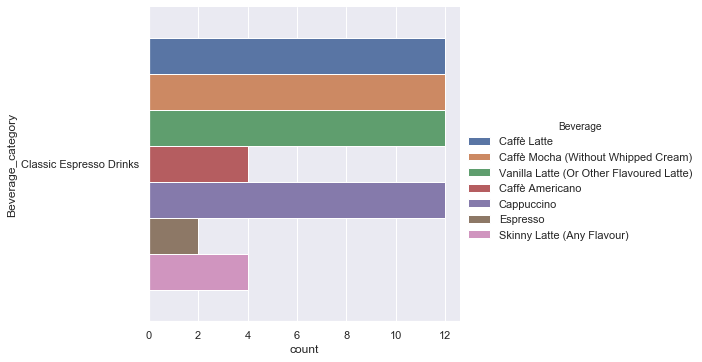

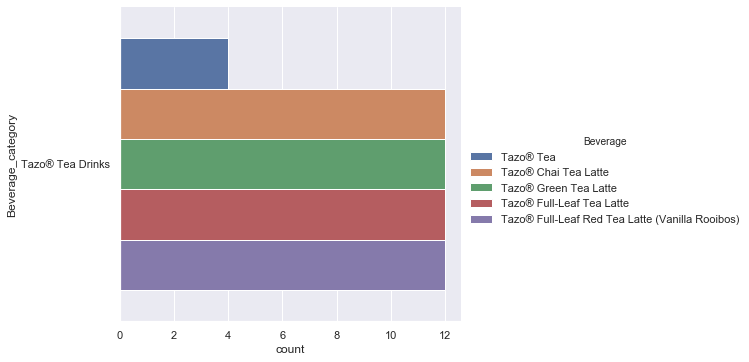

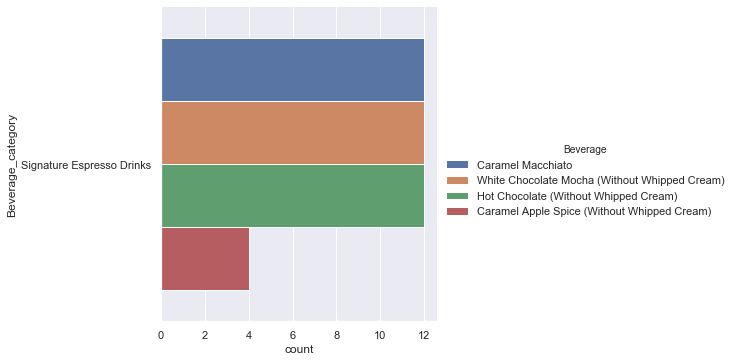

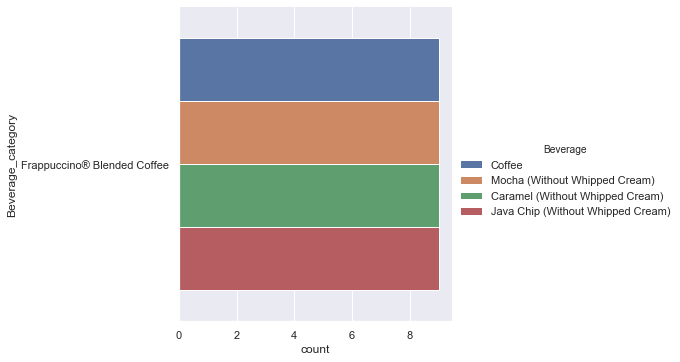

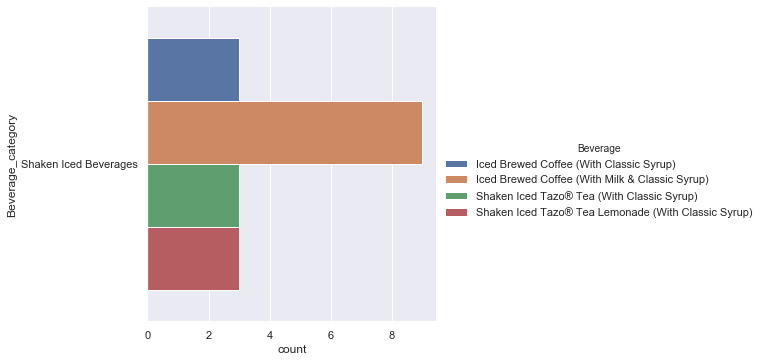

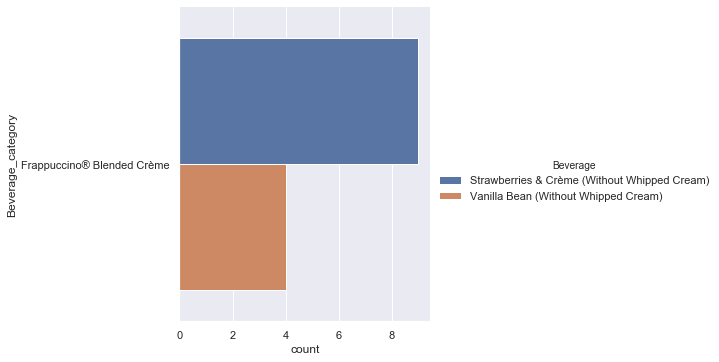

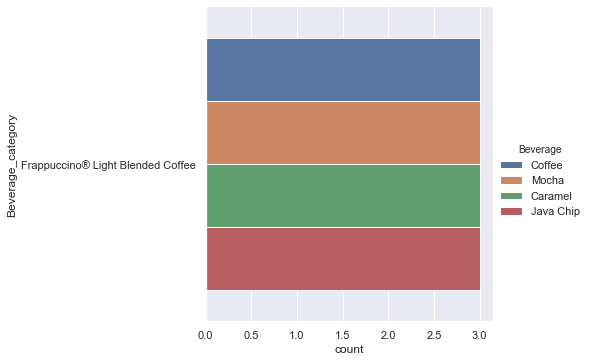

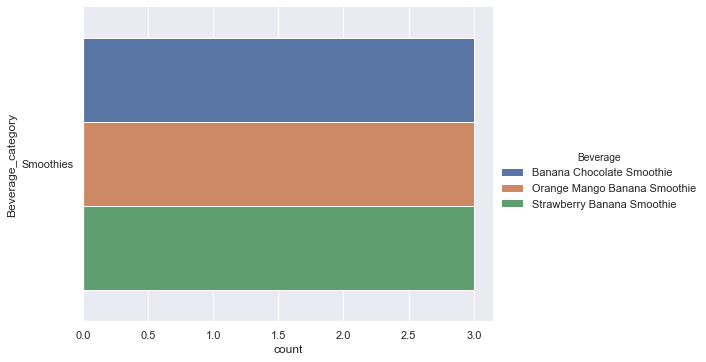

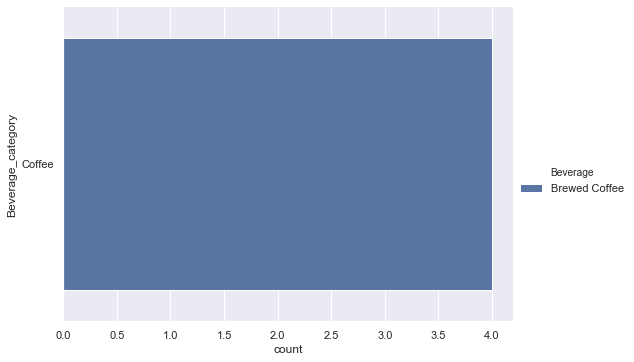

In [132]:
cat_beverage = drinks['Beverage_category'].value_counts().index
for category in cat_beverage:
    sns.catplot(y = 'Beverage_category', kind = 'count', 
                data = drinks.loc[:,['Beverage_category','Beverage']][drinks['Beverage_category'] == category], 
                hue = 'Beverage',
                height=5, aspect=1.5)

From the above plots we can see each beverage category has different types of drinks.

In [135]:
drinks['Beverage_prep'].value_counts()

Soymilk               66
2% Milk               50
Grande Nonfat Milk    26
Tall Nonfat Milk      23
Venti Nonfat Milk     22
Whole Milk            16
Short Nonfat Milk     12
Tall                   7
Grande                 7
Venti                  7
Short                  4
Doppio                 1
Solo                   1
Name: Beverage_prep, dtype: int64

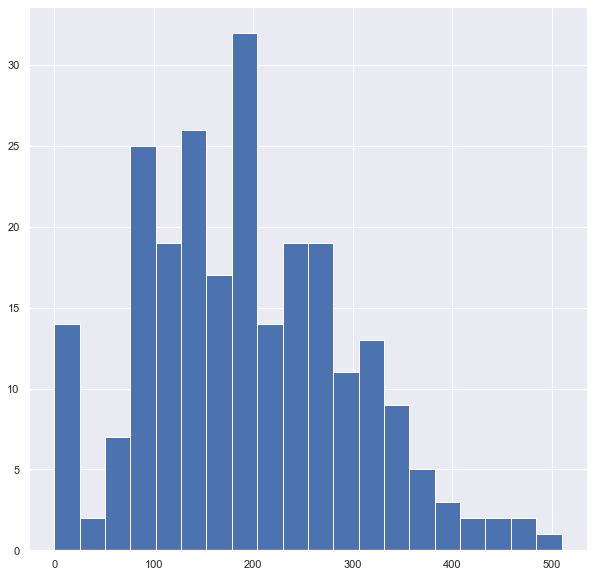

In [138]:
drinks.Calories.hist(bins = 20)

From the above histogram,it is evident that most of the beverages are of calories between 175-200 range.

Lets see what are those beverages which has 175-200 calories

Text(0.5, 1, 'The beverages which has 170-200 calories')

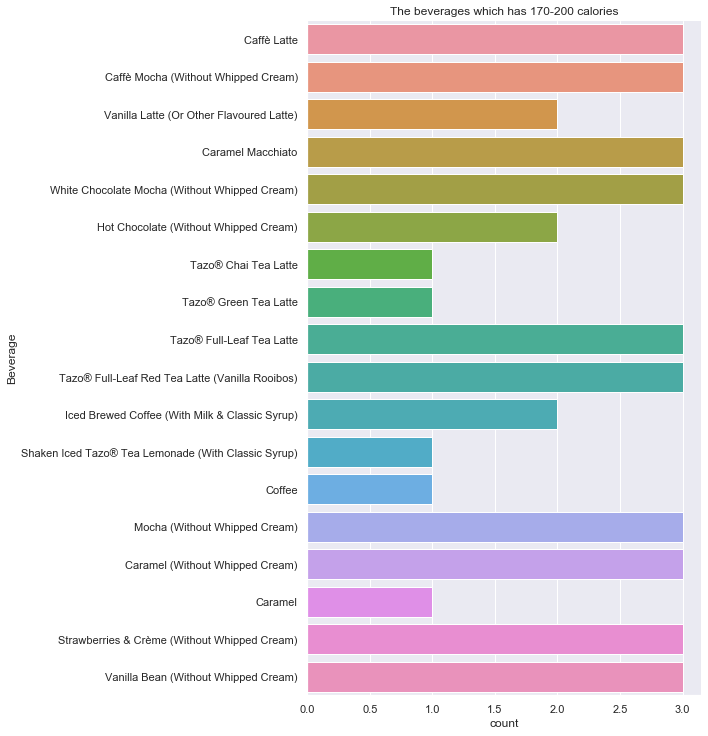

In [151]:
sns.catplot(y = 'Beverage', kind = 'count', 
           data = drinks[(drinks['Calories'] >= 170) & (drinks['Calories'] <=200)],height  =10)
plt.title("Beverages which has 170-200 calories")

There are approximatly 18 beverages whcih has calorie count between 170-200.Now lets see which beverage has the ZERO calories(very interesting category for fitness freaks) along with their ingredients i.e Beverage_prep.

#### ZERO CALORY DRINKS

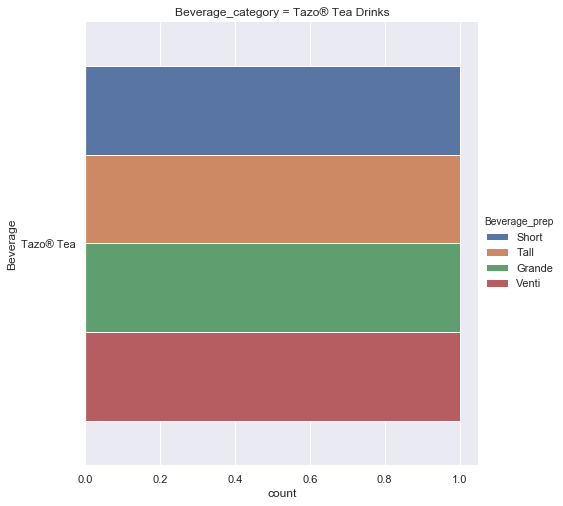

In [288]:
sns.catplot(y = 'Beverage',kind = 'count',hue = 'Beverage_prep',col = 'Beverage_category',
            data = drinks[drinks['Calories'] == 0],height = 7)


From the above plot,Only Tazo® Tea has ZERO Calories and it doesn't have any milk ingredient for the preperation it seems.

In [287]:
drinks.groupby('Beverage_category').count()

,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
Beverage_category,,,,,,,,,,,,,,,,,
Classic Espresso Drinks,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58,58
Coffee,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Frappuccino® Blended Coffee,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
Frappuccino® Blended Crème,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
Frappuccino® Light Blended Coffee,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Shaken Iced Beverages,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
Signature Espresso Drinks,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
Smoothies,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Tazo® Tea Drinks,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52


OKay.Now lets see which beverages have the highest calories range above 400 along with their Beverage_prep.

#### HIGH CALORY DRINKS

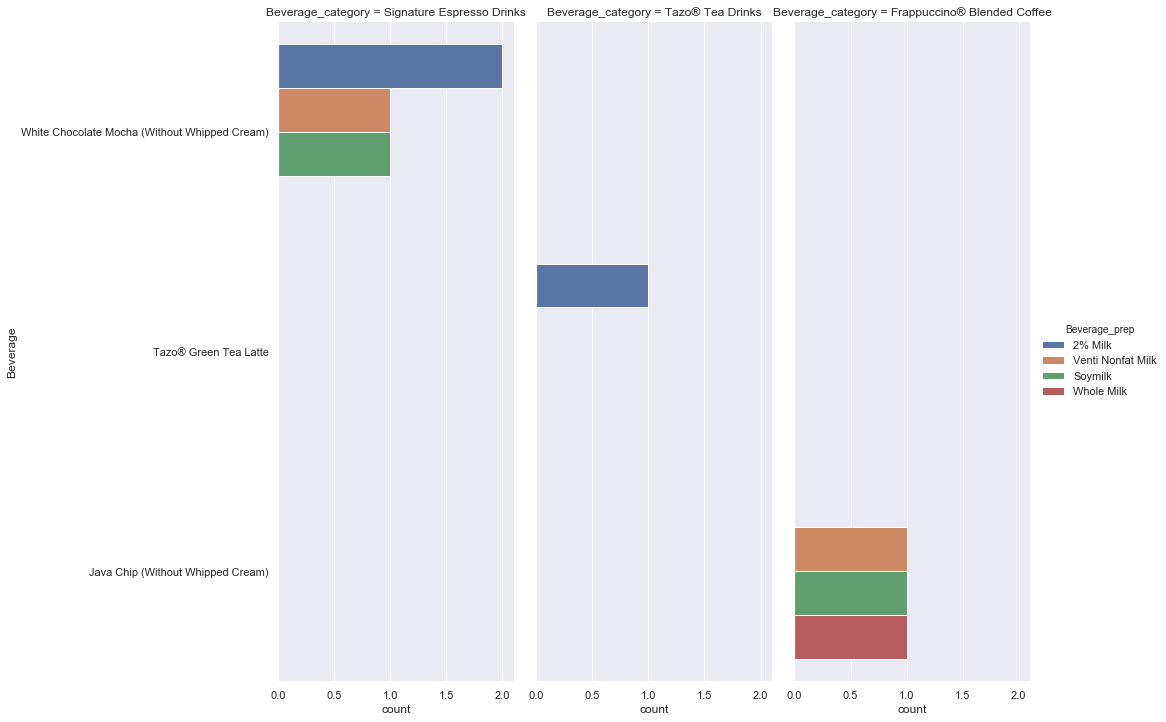

In [216]:
sns.catplot(y = 'Beverage',kind = 'count',hue = 'Beverage_prep', col = 'Beverage_category',
            data = drinks[(drinks['Calories'] >= 400)],height = 10,aspect  =0.5)


Signature Espresso Drinks(White Chocolate Mocha (Without Whipped Cream),

Tazo® Tea Drinks(Tazo® Green Tea Latte),

Frappuccino® Blended Coffee(Java Chip (Without Whipped Cream) driks have the highest calories.

In [218]:
drinks.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')

Now lets see the distribution of 'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)'.

#### DISTRIBUTION OF OTHER NUTRIANTS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3d194c810>,
      dtype=object)

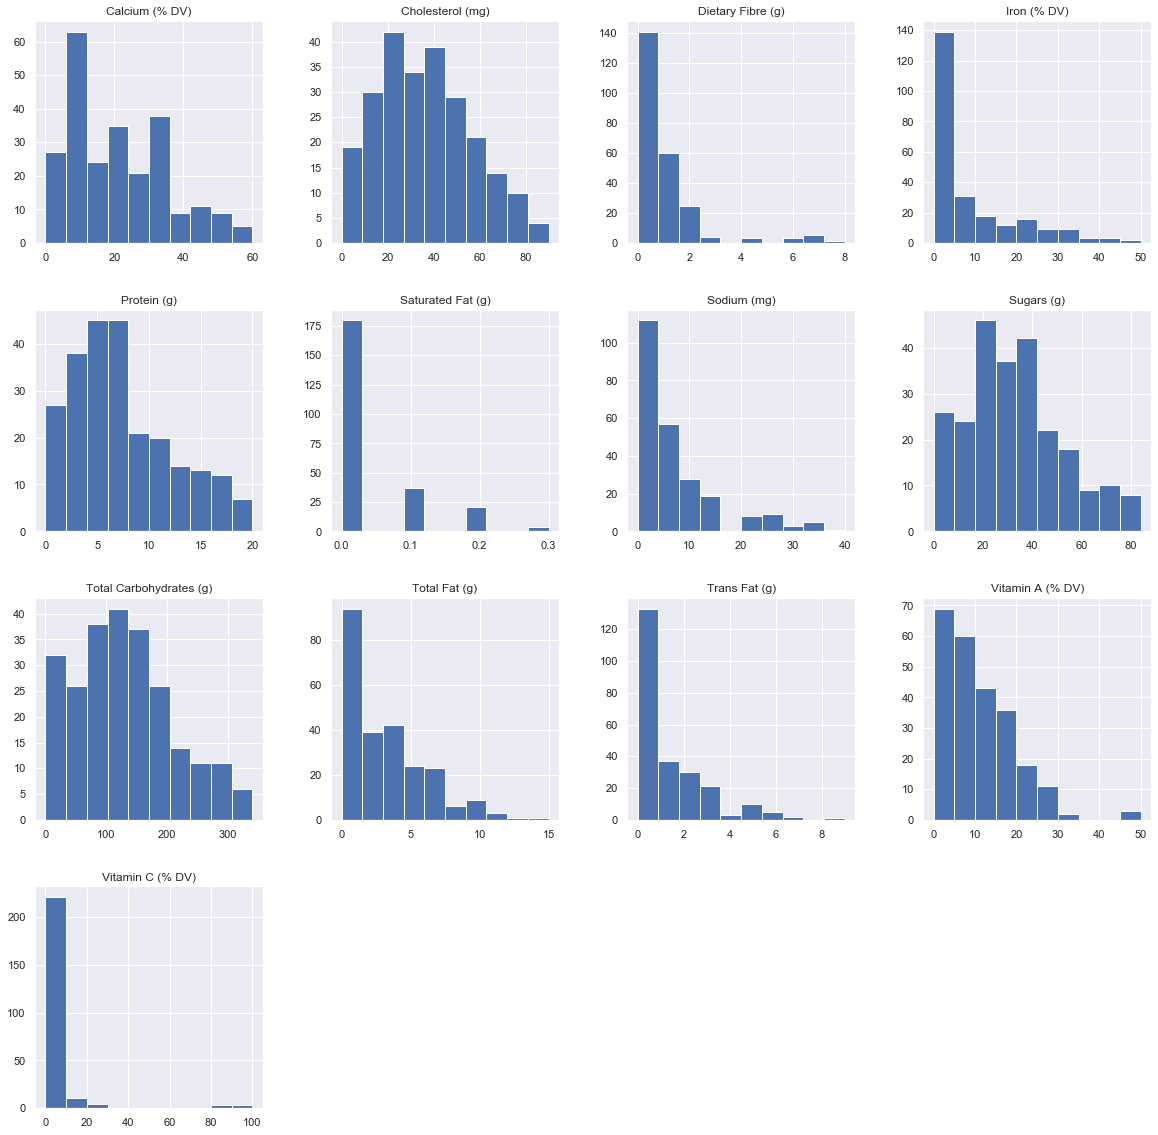

In [222]:
drinks[['Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)']].hist(bins = 10,figsize=(20,20))

Now lets get into the all time interesting factor "SUGAR".

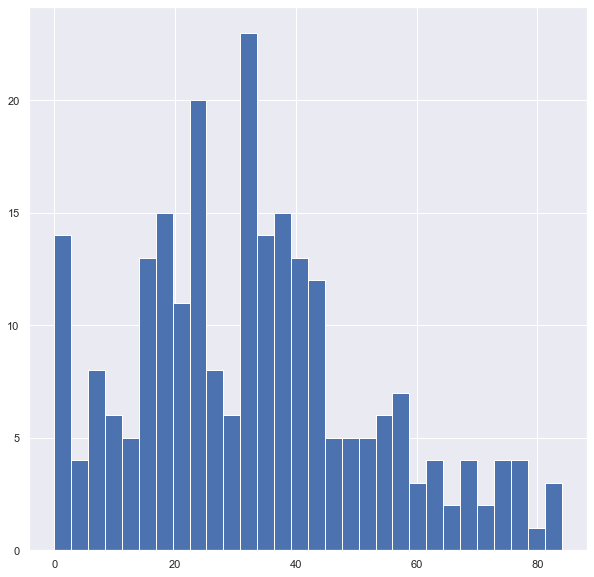

In [227]:
drinks['Sugars (g)'].hist(bins = 30)

#### ZERO SUGAR DRINKS

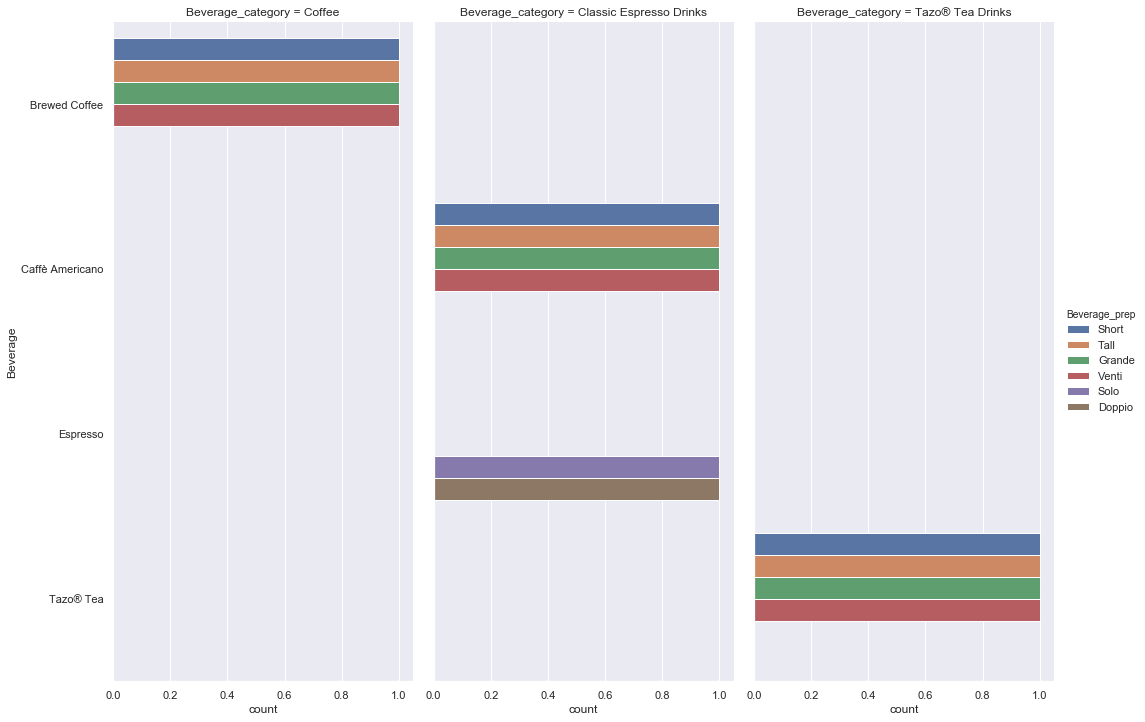

In [223]:
sns.catplot(y = 'Beverage',kind = 'count',hue = 'Beverage_prep', col = 'Beverage_category',
            data = drinks[(drinks['Sugars (g)'] == 0 )],height = 10,aspect  =0.5)

People who wants only zero sugar drinks,they can go for Brewed Coffee,Caffe Americano,Espresso,Tazo® Tea without 

adding any additional ingredients(Look above the Beverage_prep)

#### HIGH SUGARY DRINKS

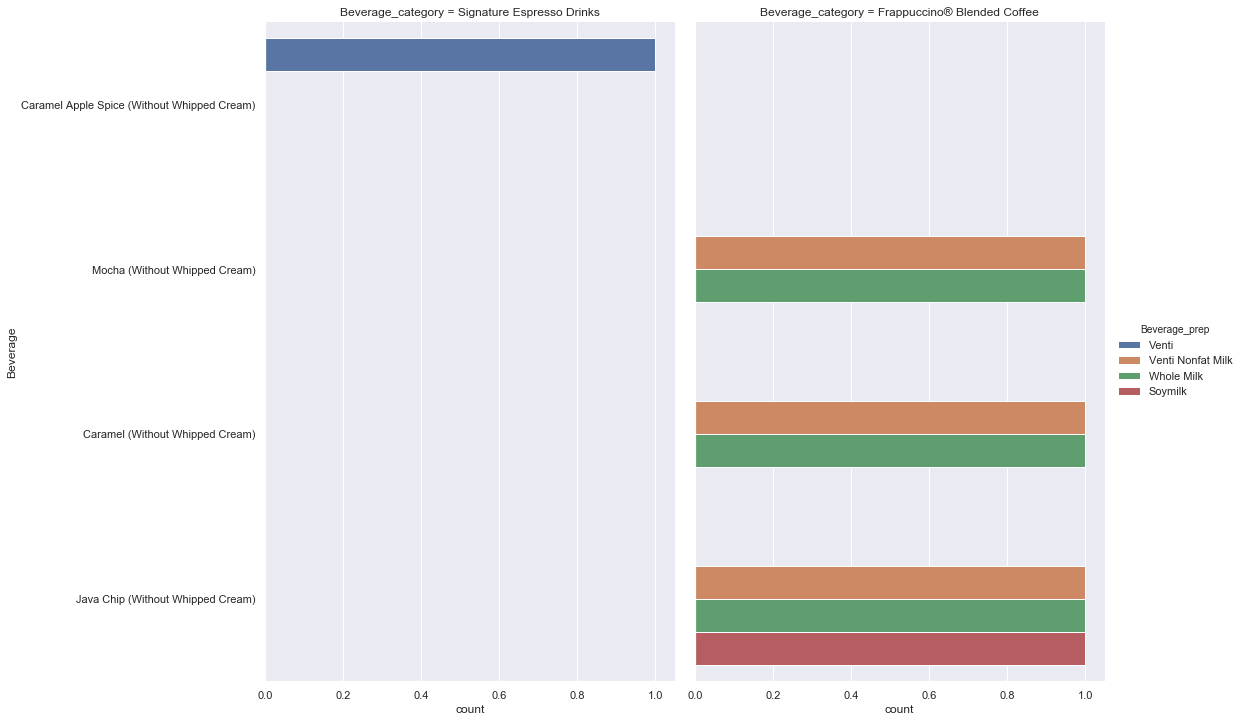

In [231]:
sns.catplot(y = 'Beverage',kind = 'count',hue = 'Beverage_prep', col = 'Beverage_category',
            data = drinks[(drinks['Sugars (g)'] >= 75 )],height = 10,aspect  =0.8)

Loks like Caramel Apple Spice(without whipped cream) and Frappuccino® Blended Coffee(Mocha (Without Whipped 
Cream,Caramel (Without Whipped Cream),Java Chip (Without Whipped Cream)) are very high in sugar.People who are 
worried about very high sugar percentage should avoid the above listed beverages.

The American Heart Association’s recommendations for sugar intake:

Men : should consume no more than 9 teaspoons (36 grams or 150 calories) of added sugar per day.

Women : 6 teaspoons (25 grams or 100 calories) per day. 

Now lets have a look at drinks which has 25grams or less of sugar.

#### DRINKS WHICH HAS 25g OR LESS SUGAR

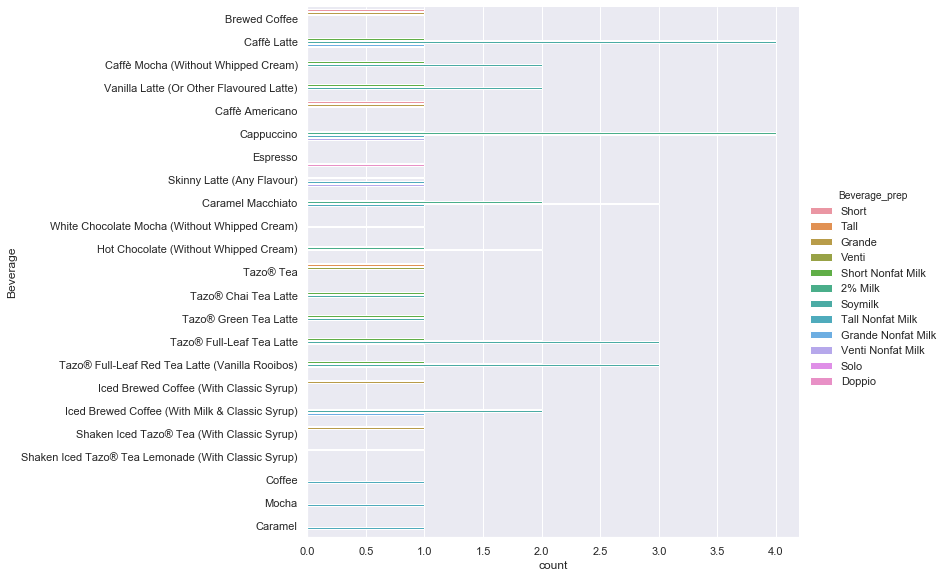

In [240]:
sns.catplot(y = 'Beverage',kind = 'count',hue = 'Beverage_prep', 
            data = drinks[(drinks['Sugars (g)'] <= 25 )],height = 8,aspect =1.5)

People(especially women) who wants to drink the starbucks beverage with in the recommedation dosage of sugar per day can opt for the above drinks.Sadly even though if they drink one of the above beverages , they are going to consume their whole day dosage of sugar in one single cup.

#### DRINKS WHICH HAS 35g OR LESS SUGAR

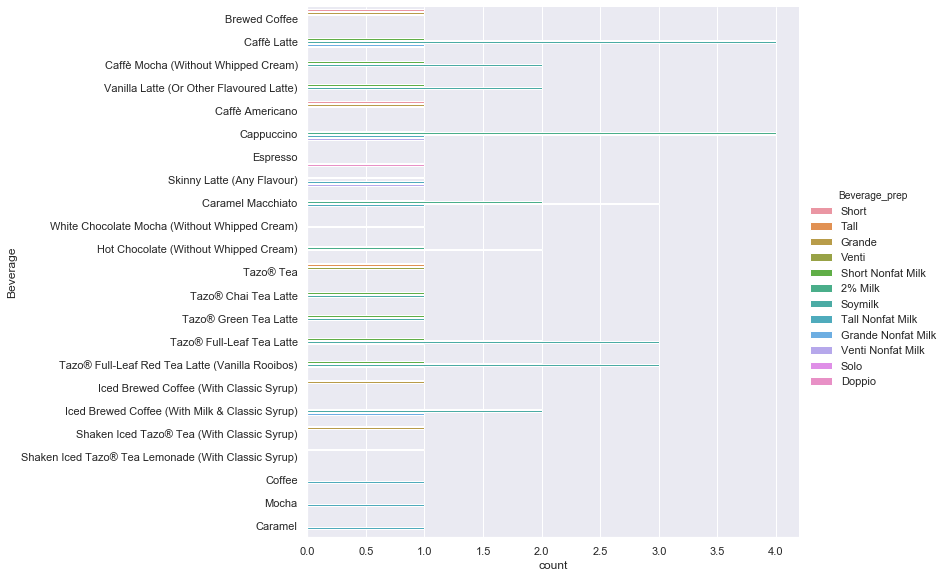

In [242]:
sns.catplot(y = 'Beverage',kind = 'count',hue = 'Beverage_prep', 
            data = drinks[(drinks['Sugars (g)'] <= 25 )],height = 8,aspect =1.5)

People(especially Men) who wants to drink the starbucks beverage with in the recommedation dosage of sugar per day can opt for the above drinks.

##### Now lets see how is sugar related to calories.

Make some hypothesis.

#### Does sugar has significant effect on Cholesterol ?


#### HYPOTHESIS


. Null hypothesis(H0):Sugar doesn't have any effect on Calories.

. Alternate hypothesis(H1):Sugar has significant effect on calories.


The Pearson Correlation test is used to analyze the strength of a relationship between two provided variables, both quantitative in nature. The value, or strength of the Pearson correlation, will be between +1 and -1.

A correlation of 1 indicates a perfect association between the variables, and the correlation is either positive or negative. Correlation coefficients near 0 indicate very weak, almost non-existent, correlations. While there are other ways of measuring correlations between two variables, such as Spearman Correlation or Kendall Rank Correlation, Pearson correlation is probably the most commonly used correlational test.

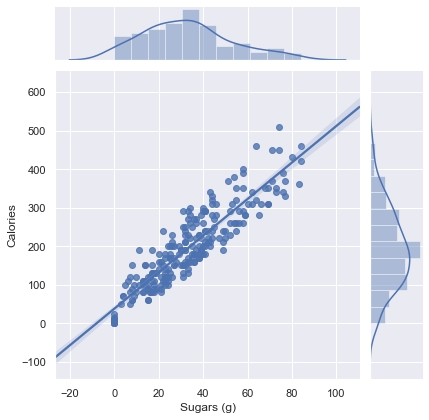

In [290]:
sns.jointplot(x = 'Sugars (g)',y  ='Calories',data = drinks,kind = 'reg')

There is a strong positive correlation between sugars and calories.

Unsurprisingly, High sugar leads to High calories.That means the drinks with more sugars also higher in calories.

#### PEARSON  COEFFICIENT STATISTICAL TEST

In [289]:
from scipy import stats
stats.pearsonr(drinks['Sugars (g)'],drinks['Calories'])

(0.9096754266806336, 1.458746125955489e-93)

The above result shows that

correlation  = 0.91

p-value = 1.458746125955489e-93 which almost 0.

Because p-value is < 0.05 ,we are rejecting null hypothesis that Sugar doesn't have any effect on Calories.



Now lets explore the three major nutrients Protien,Fat,carbohydrates which contributes all together to the total calories .

#### PROTIEN

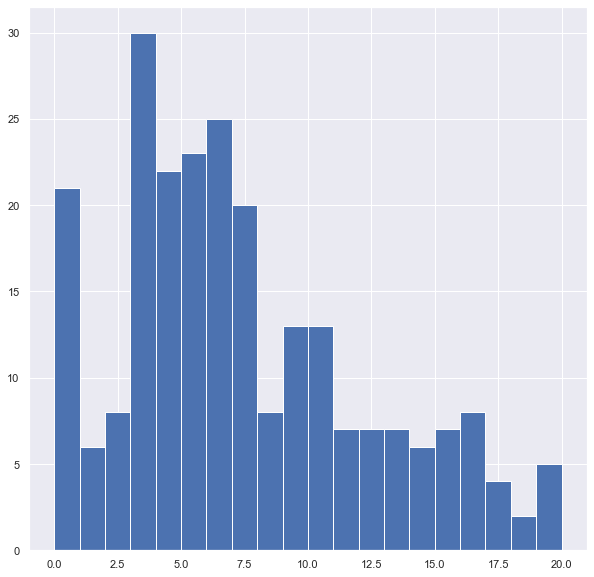

In [247]:
drinks['Protein (g)'].hist(bins=20)

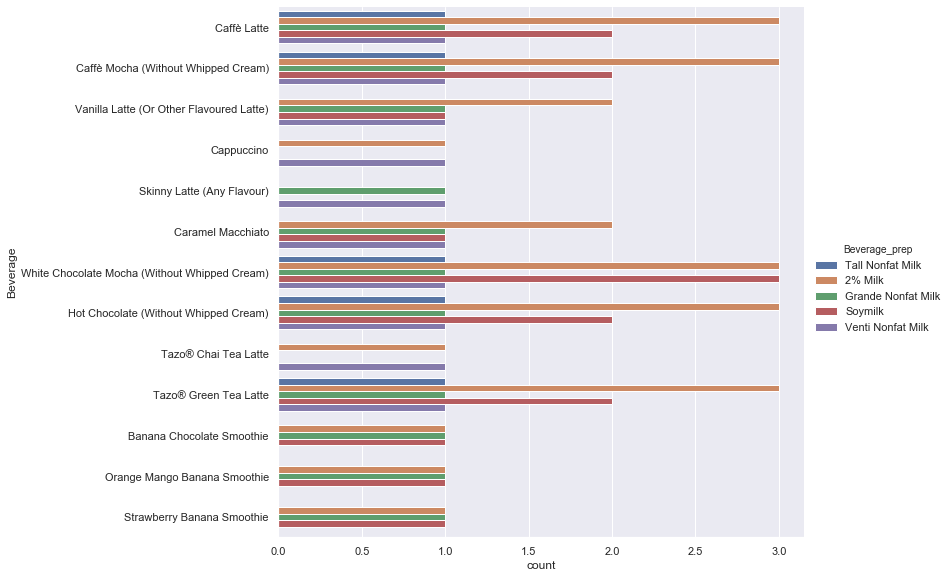

In [250]:
sns.catplot(y = 'Beverage',kind = 'count',hue = 'Beverage_prep', 
            data = drinks[drinks['Protein (g)'] >= 10],height = 8,aspect =1.5)

people who wants the drinks which has more protien(>10g) in it should look for the above beverages.

#### Now lets explore how is protien related to calories.

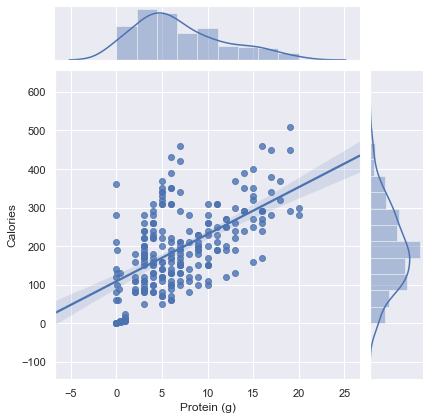

In [261]:
sns.jointplot(x = 'Protein (g)',y  ='Calories',data = drinks,kind = 'reg')

From the above plot it is evident that there is a correlation between protien and calories.

#### HIGH PROTIEN WITH LESS THAN 25g SUGARY DRINKS

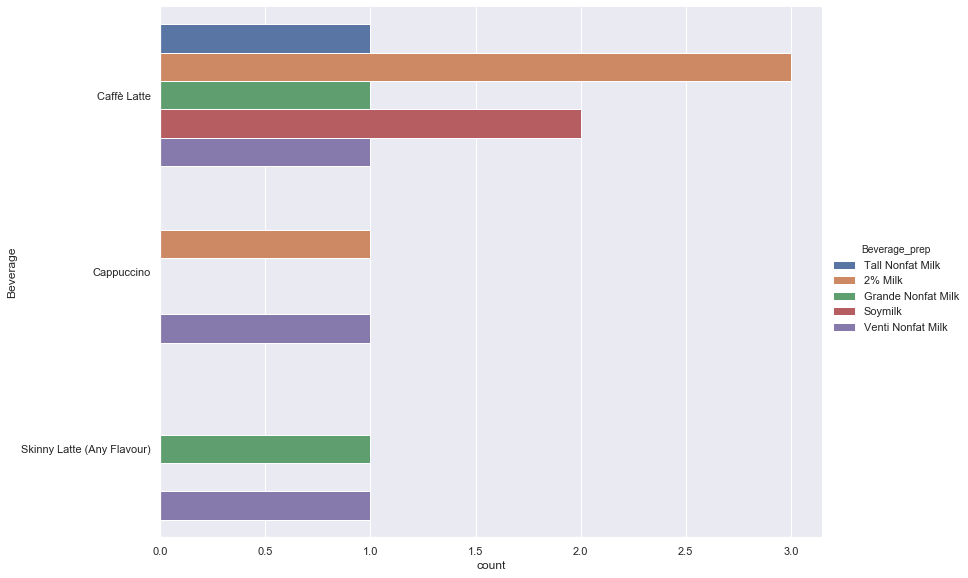

In [259]:
sns.catplot(y = 'Beverage',kind = 'count',hue = 'Beverage_prep', 
            data = drinks[(drinks['Protein (g)'] >= 10) & (drinks['Sugars (g)'] <=25)],height = 8,aspect =1.5)

People who wants High protien with less than 25g sugar can go for caffe Latte,Cappuccino and Skinny Latte.

#### FAT

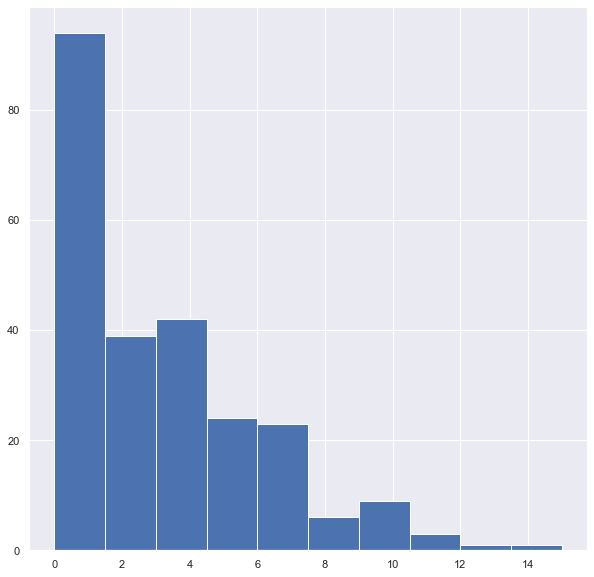

In [264]:
drinks['Total Fat (g)'].hist(bins =10)

#### DRINKS WITH MORE THAN 10g FAT

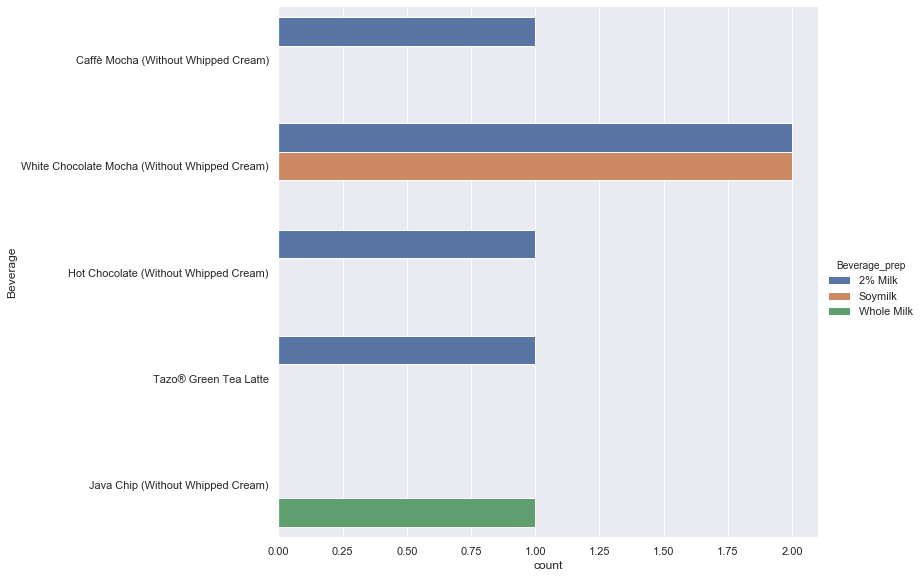

In [266]:
sns.catplot(y = 'Beverage',kind = 'count',hue = 'Beverage_prep', 
            data = drinks[drinks['Total Fat (g)'] >= 10],height = 8,aspect =1.5)

#### Now lets explore how is Fat related to calories.

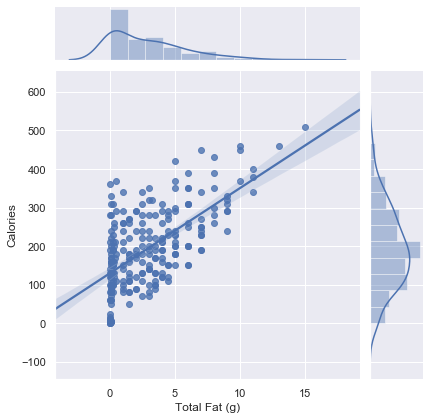

In [267]:
sns.jointplot(x = 'Total Fat (g)',y  ='Calories',data = drinks,kind = 'reg')

From the above plot, we can say there is a correlation between Fat and calories.

#### ZERO FAT DRINKS

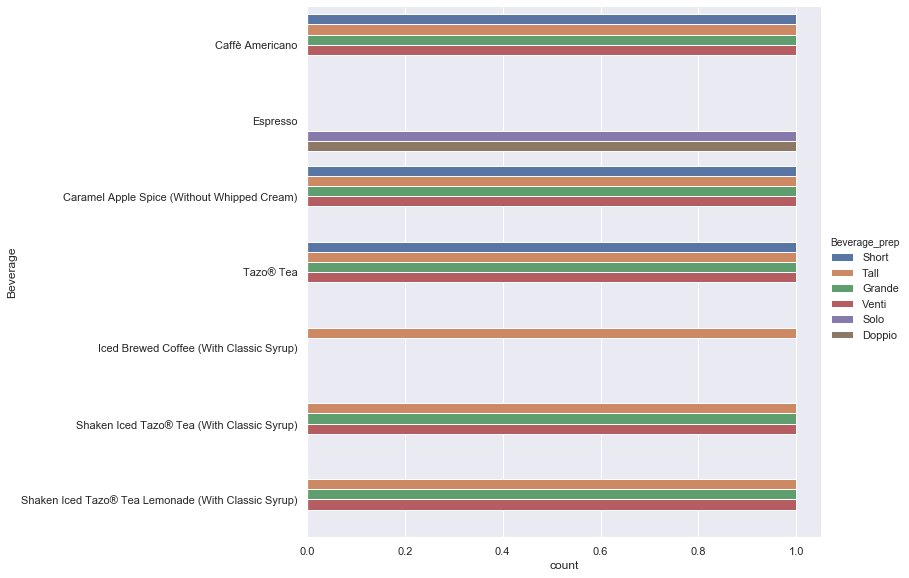

In [293]:
sns.catplot(y = 'Beverage',kind = 'count',hue = 'Beverage_prep', 
            data = drinks[(drinks['Total Fat (g)'] == 0)],height = 8,aspect =1.5)

There are 7 types of beverages with zero fat content.

#### CARBOHYDRATES

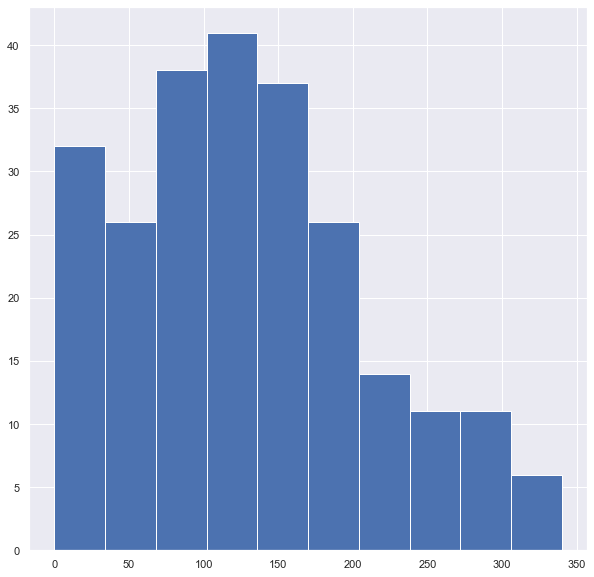

In [278]:
drinks['Total Carbohydrates (g)'].hist(bins =10)

#### ZERO CARB DRINKS

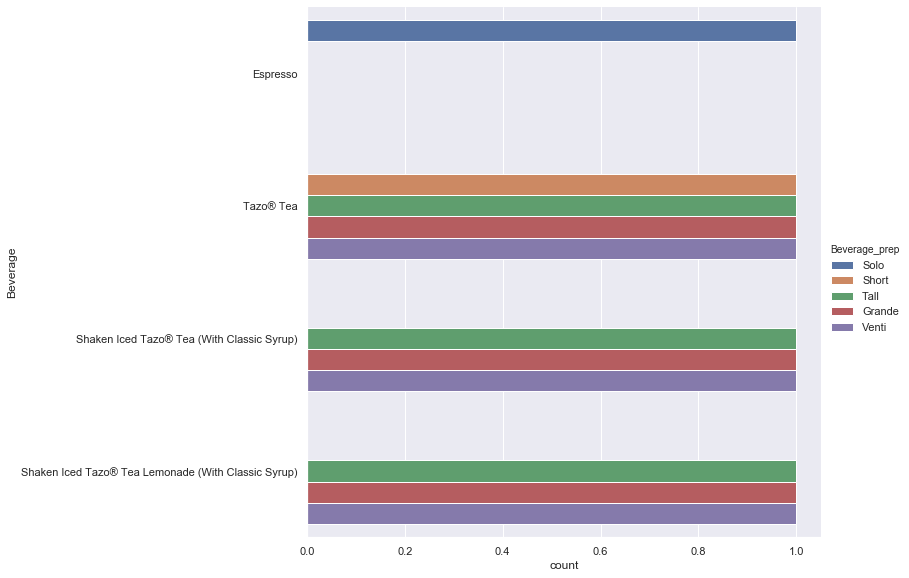

In [279]:
sns.catplot(y = 'Beverage',kind = 'count',hue = 'Beverage_prep', 
            data = drinks[drinks['Total Carbohydrates (g)'] == 0],height = 8,aspect =1.5)

There are 4 types of beverages with zero carbs.

#### HIGH CARB DRINKS

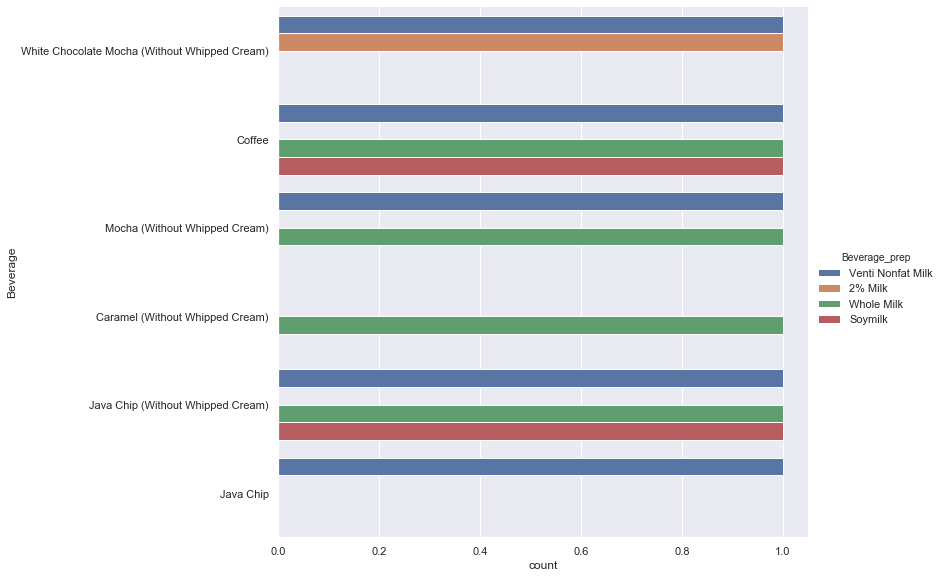

In [280]:
sns.catplot(y = 'Beverage',kind = 'count',hue = 'Beverage_prep', 
            data = drinks[drinks['Total Carbohydrates (g)'] >= 300],height = 8,aspect =1.5)

#### Explore how are carbs related with Calories?

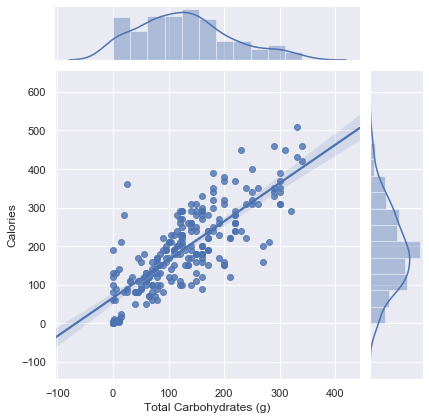

In [281]:
sns.jointplot(x = 'Total Carbohydrates (g)',y  ='Calories',data = drinks,kind = 'reg')

### CHOLESTEROL

Cholesterol is a waxy substance found in your blood. Your body needs cholesterol to build healthy cells, but high levels of cholesterol can increase your risk of heart disease

#### Does sugar has significant effect on Cholesterol ?


#### HYPOTHESIS

. Null hypothesis(H0):Sugar doesn't have any effect on Cholesterol.

. Alternate hypothesis(H1):Sugar has significant effect on cholestrol.

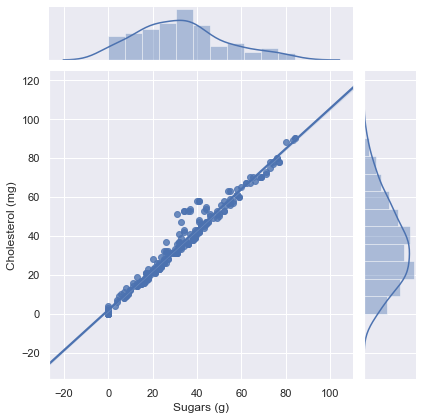

In [282]:
sns.jointplot(x = 'Sugars (g)',y  ='Cholesterol (mg)',data = drinks,kind = 'reg')

#### PEARSON  COEFFICIENT STATISTICAL TEST

In [285]:
from scipy import stats
stats.pearsonr(drinks['Sugars (g)'],drinks['Cholesterol (mg)'])

(0.9841958158323714, 1.91001081261061e-182)

The above result shows that

correlation  = 0.98

p-value = 1.91001081261061e-182 which almost 0.

Because p-value is < 0.05 ,we are rejecting null hypothesis that Sugar doesn't have any effect on Cholesterol.



And we can conclude that sugar has very strong significant effect on Cholesterol.

Now lets make another Hypothesis.

#### CAN COFFEE RAISE CHOLESTEROL?

For this we are exploring the relationship between caffine and cholesterol.

#### HYPOTHESIS

. Null hypothesis(H0):Caffeine doesn't have any effect on Cholesterol.

. Alternate hypothesis(H1):Caffeine has significant effect on cholestrol.

In [315]:
caffeine = drinks.drop(drinks[(drinks['Caffeine (mg)'] == 'varies') | (drinks['Caffeine (mg)'] == 'Varies') ].index)


In [318]:
caffeine['Caffeine (mg)'] = caffeine['Caffeine (mg)'].astype('int')

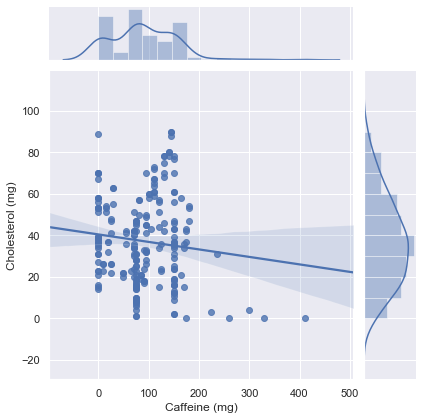

In [319]:
sns.jointplot(x = 'Caffeine (mg)',y  ='Cholesterol (mg)',data = caffeine,kind = 'reg')

In [320]:
from scipy import stats
stats.pearsonr(caffeine['Caffeine (mg)'],caffeine['Cholesterol (mg)'])

(-0.11146602920766789, 0.09914092376291486)

From the above statistical test 

correlation  = -0.11

p-value = 0.09 

##### Because p-value > 0.05, we are accepting the null hypothesis that Caffeine doesn't have any effect on Cholesterol


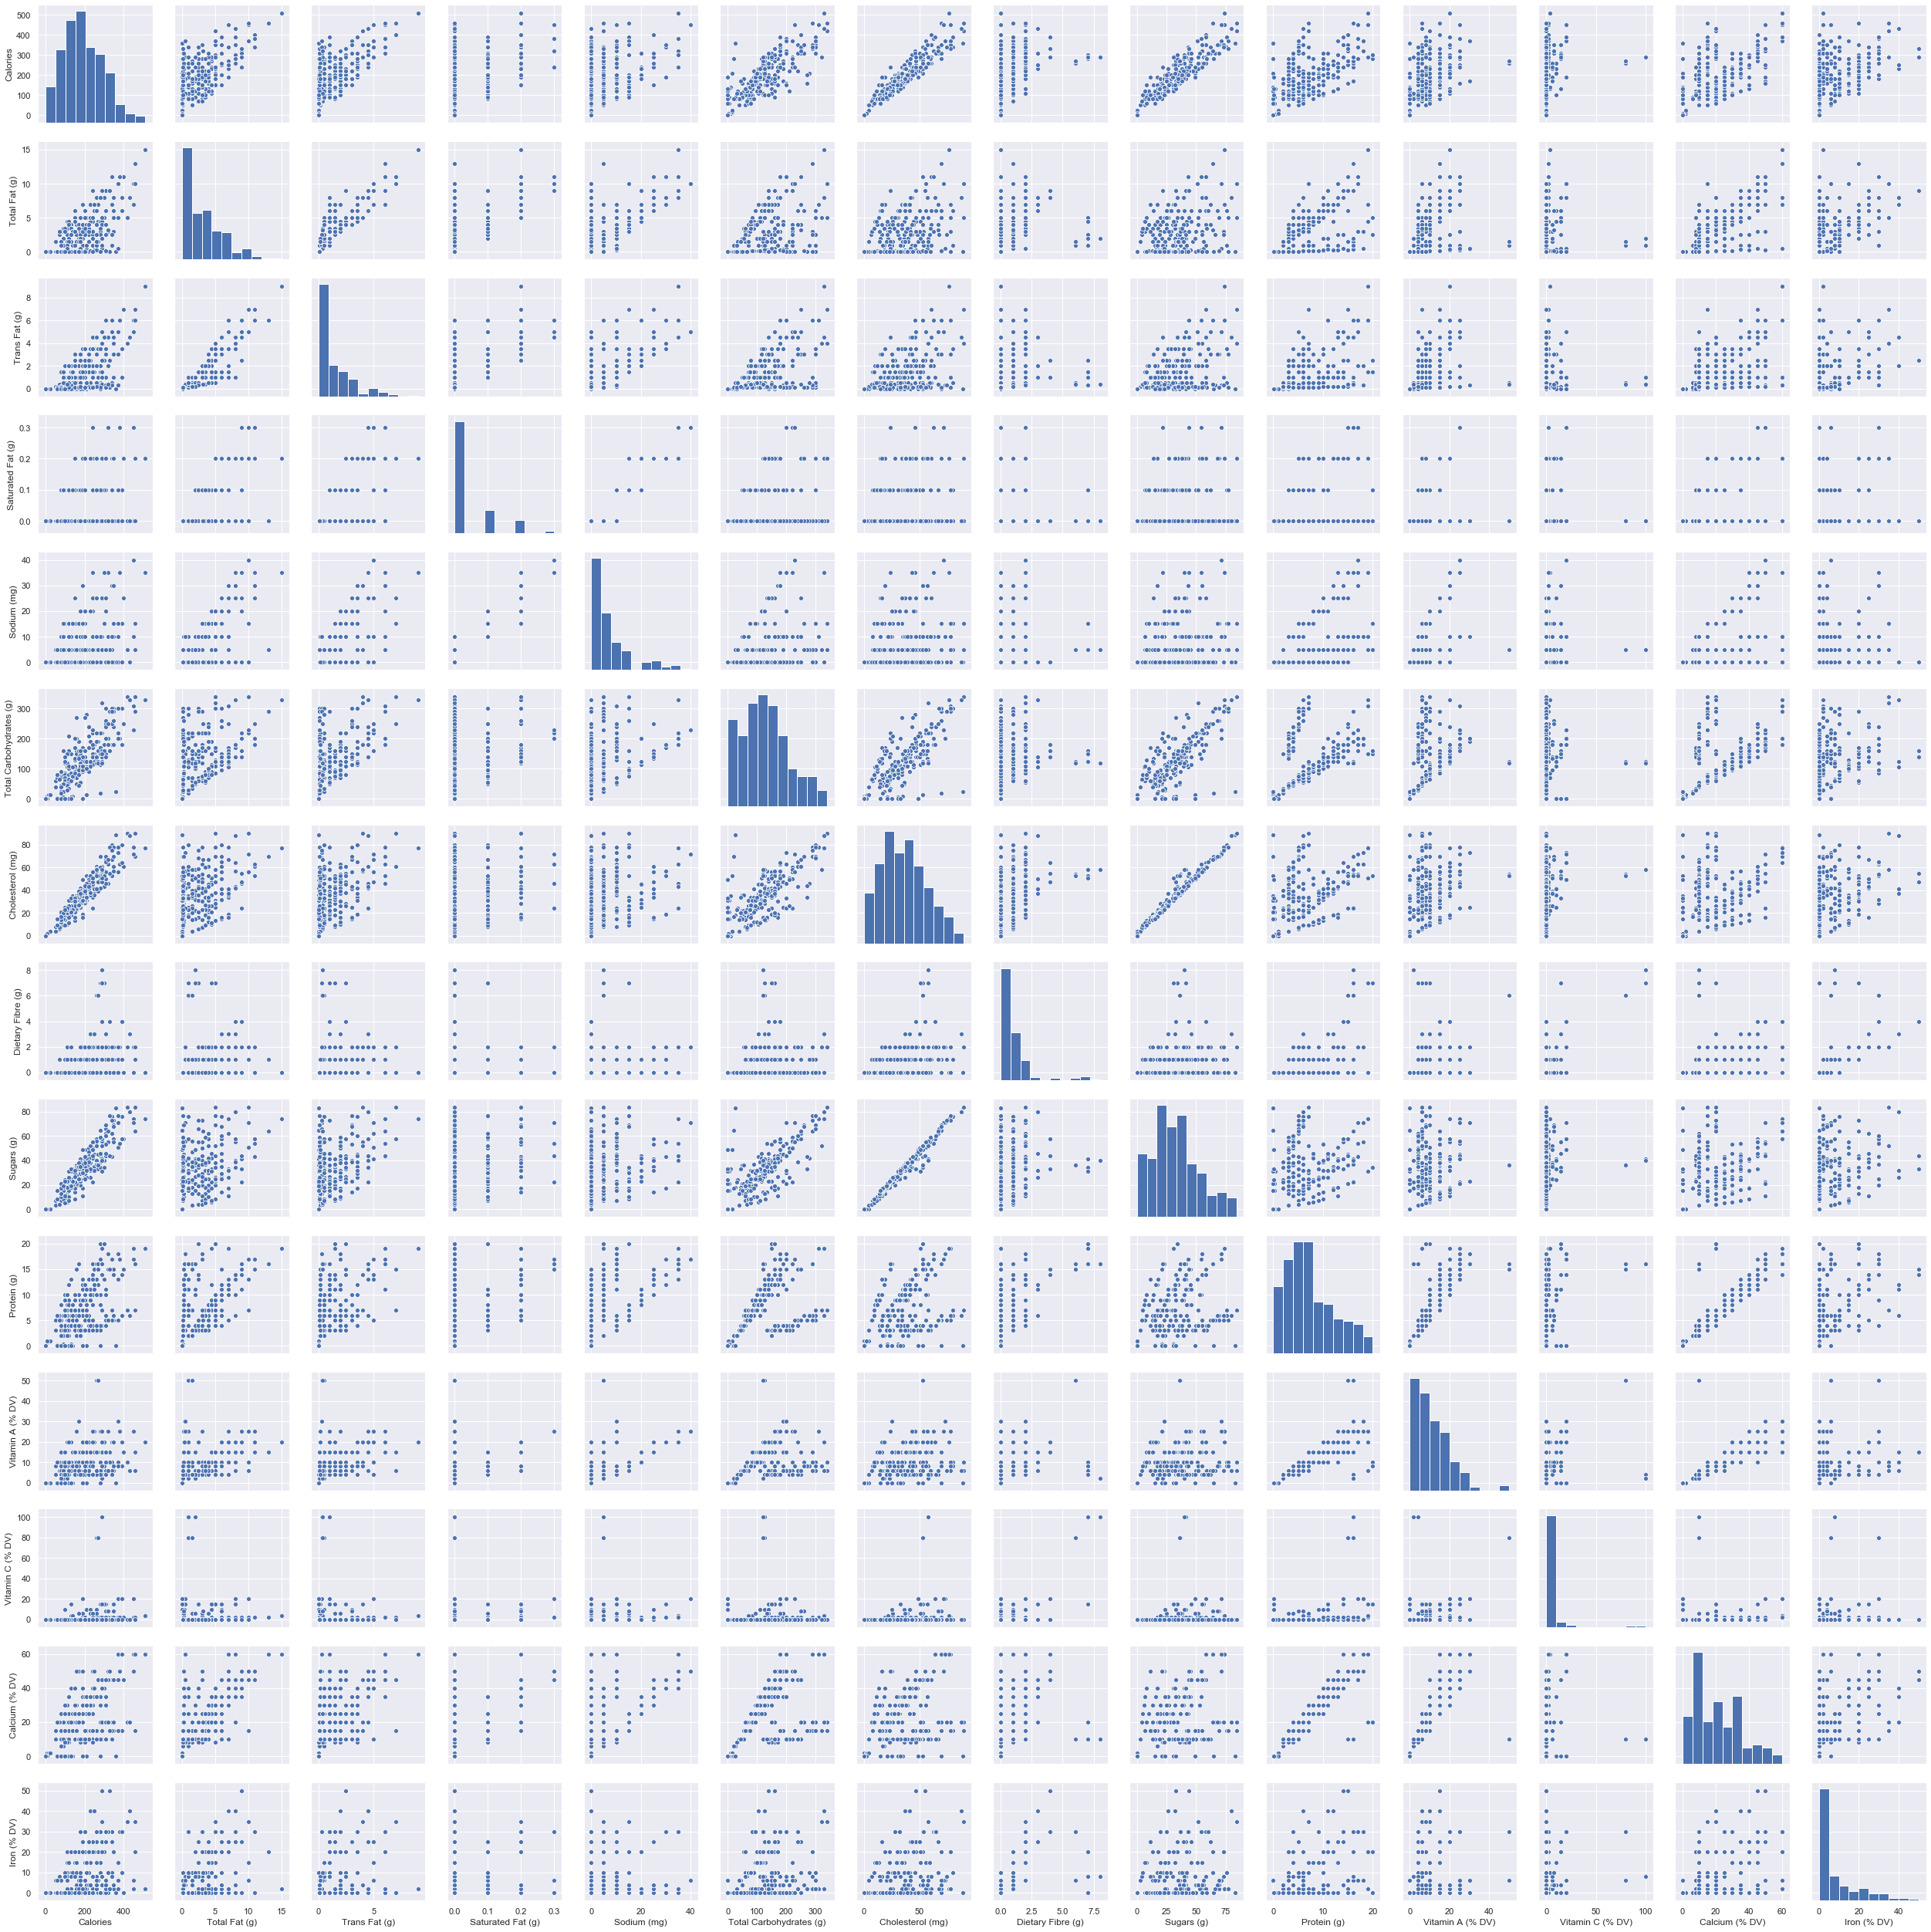

In [322]:
#pairplots
sns.pairplot(drinks)

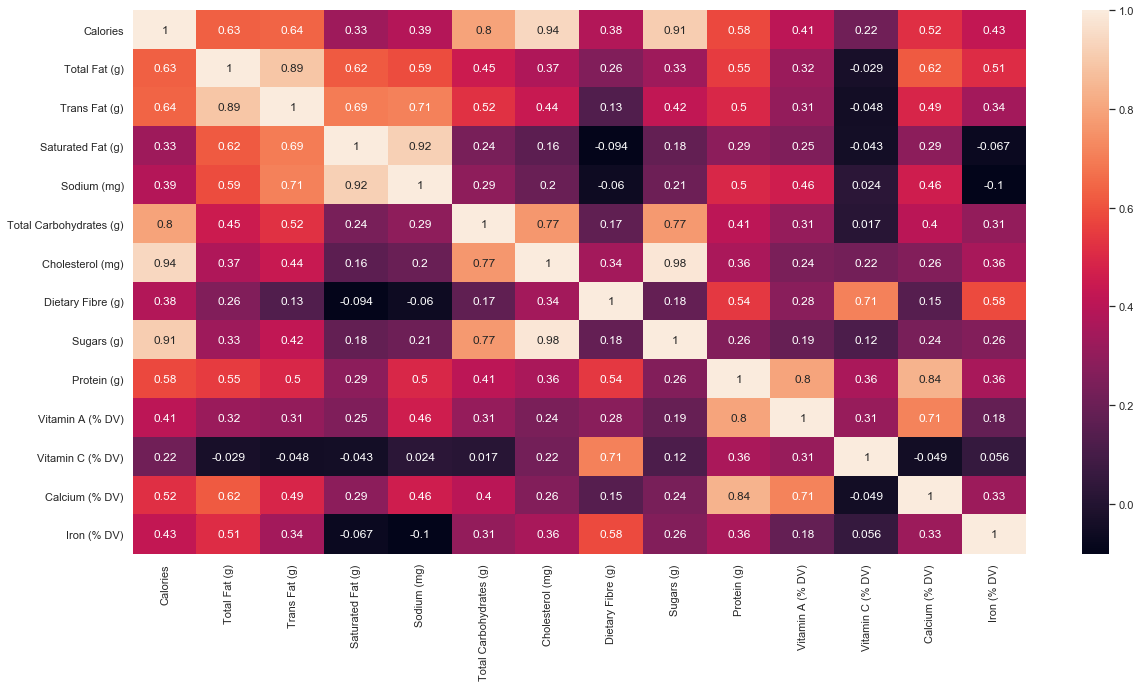

In [321]:
#HeatMap
plt.figure(figsize = (20,10))
sns.heatmap(drinks.corr(),annot = True)

Looks like there are number of strong correlations between features.

#### CONCLUSION

We explored the different types of Nutriants.

We identified the zero fat,carb,sugar drinks along with some high protien.

And made some hypothesis about
    Does sugar has significant effect on Cholesterol ?
    CAN COFFEE RAISE CHOLESTEROL?
    

#### Improvements

Further we can analyze more about the correlations between features and can make some sensible hypothesis.

Can find what proportion of fat,protein and carbs contributes to total calories?

